# Table of Contents


* [Preface                  ](#chapter1)
* [Chapter 1. Graph Generation and Printing                    ](#chapter2)
 * [Import Statements  ](#chapter3)
 * [Generating from Data Structure: toGraph                  ](#chapter4)
 * [Generating from Graphviz Text: fromDot                  ](#chapter5)
 * [Supplying additional data to nodes and edges                  ](#chapter6)
 * [Labeling Nodes                  ](#chapter7)
 * [Numbering Paths              ](#chapter8)
 * [Displaying Strong and Weak Ties               ](#chapter9)
* [Chapter 2. Accessing Nodes and Edges                  ](#chapter10)
 * [Iterating through nodes                  ](#chapter11)
 * [Iterating over edges                  ](#chapter12)
 * [Iterating over neighbors of graphs                  ](#chapter13)
 * [Iterating over pairs of neighbors                  ](#chapter14)
* [Chapter 3. Transitioning Graphs                  ](#chapter15)
 * [Breadth-first search                  ](#chapter16)
 * [Depth-first search                ](#chapter17)


# Preface                   <a id="chapter1"></a>

Welcome to the WebScience course 2017/2018. This ipython document will walk you through the preliminaries that you need to solve the exercises given to you during the course. We assume that you know the programming language <a href="https://en.wikipedia.org/wiki/Python_(programming_language)">python</a>. If you do not know python or you need a refresher, we recommend doing the following web course (13h), before you start with the content below:

<a href="https://www.codecademy.com/tracks/python">https://www.codecademy.com/tracks/python</a>

This document is structured as follows: in the first chapter, we explain how you create graphs and print them. In the second chapter, we describe how you access the nodes and edges of a graph. In the third chapter we discuss two popular methods two iterate through graphs.



# Chapter 1. Graph Generation and Printing                     <a id="chapter2"></a>

## Import Statements   <a id="chapter3"></a>
The following import instructions should always appear in the beginning of your notebook. 

* ``networkx`` is the graph library that we use (also refer to <a href="http://networkx.readthedocs.org/en/latest/">the manual</a>),
* ``IPython.display.display``
* ``utils`` are some handy functions that we  provide ontop of networkx,
* ``graphs`` is a collection of graphs (mainly those from the book)

In [2]:
import networkx as nx
from IPython.display import display
from utils import *
from graphs import *
from pygraphviz import *

In the utils library, we provide two ways to generate graphs in ipython. 

* ``toGraph`` to generate graphs from a dictionary of neighbor lists.
* ``fromDot`` to generate graphs from text in the the graphviz language. 

Once a graph is created, you can use the function ``draw`` to draw the graph.

## Generating from Data Structure: toGraph                   <a id="chapter4"></a>
The function ``toGraph`` takes a dictionary maping node keys to lists of neighbors of this node keys.


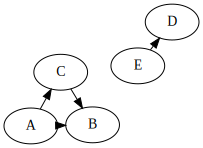

In [3]:
G = toGraph({
  'A': ['B', 'C'],
  'B': ['C'],
  'D': ['E']
})
draw(G)

## Generating from Graphviz Text: fromDot                   <a id="chapter5"></a>
The function ``fromDot`` takes a graph definition according to the graphviz language. Basically, you can name nodes and establish edges between them using a double dash '--' (see the example). For a more in-depth description of the graphviz language please refer to <a href="http://www.graphviz.org/doc/info/lang.html">the offical reference</a> or <a href="http://www.graphviz.org/Documentation/dotguide.pdf">this guide</a>.


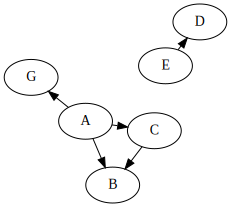

In [4]:
G = fromDot('''
strict graph A {
A -- B -- C -- A;
A -- G;
E -- D;
}''')
draw(G)

## Supplying additional data to nodes and edges                   <a id="chapter6"></a>

Sometimes it is necessary to add additional data to a node. For example, in Chapter 4 of the book we will refer investigate whether nodes having a particular binary properties, such as the race of a person, causes the graph to be particularly separated. In the following example, we specify that the node 'E' is green. 

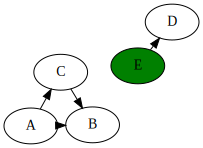

In [5]:
G = fromDot('''
strict graph A {
A -- B -- C -- A;
E -- D;
E[fillcolor=green, style=filled];
}''')
draw(G)

## Labeling Nodes                   <a id="chapter7"></a>

Sometimes it is handy to provide an additional label to nodes. You can add numbers to nodes by adding a mapping from node keys to label additions.

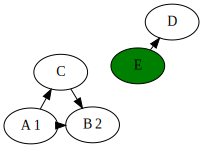

In [6]:

visiting = {'A': 1, 'B': 2}
draw(G, visiting)

## Numbering Paths               <a id="chapter8"></a>

Sometimes it is handy to number paths. This is dune by adding an edge mapping (``emapping``) argument to the draw function. To number paths we can use the existing ``pathNumberer`` function.

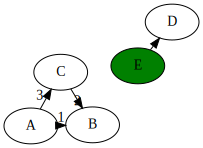

In [7]:
draw(G, emapping=pathNumberer(['A','B','C', 'A']))

## Displaying Strong and Weak Ties                <a id="chapter9"></a>

In some chapters it is necessary to differentiate between strong and weak ties. The strength of a tie is specified via
the weight attribute of an edge. The state of a tie can be specified with the strongWeadEdges ``emapping``.

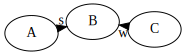

In [8]:
# You can number paths
G = fromDot('''
strict graph A {
A -- B [weight=0.9]; # end
B -- C [weight=0.1]; # weak
}''')
draw(G, emapping=strongWeakEdges())

# Chapter 2. Accessing Nodes and Edges                   <a id="chapter10"></a>

When doing the programming assignments, it is often necessary to access all nodes and edges of a graph. This chapter tells you how to do this with the ``networkx`` library.  


## Iterating through nodes                   <a id="chapter11"></a>

You can iterate over all nodes of a graph by using the ``nodes()`` method. By default, the function returns a list of node keys. To access the data of a node, you can specify the optional parameter ``data`` to be true. See the following example.

In [9]:
G = fromDot('''
strict graph A {
A -- B -- C -- A;
E -- D;
E[fillcolor=green, style=filled];
}''')
for n in G.nodes():
    print n
# including the nodes' data
for n,d in G.nodes(data=True):
    print n,d

A
C
B
E
D
A {}
C {}
B {}
E {'style': 'filled', 'fillcolor': 'green'}
D {}


## Iterating over edges                   <a id="chapter12"></a>

You can iterate over the edges of a graph using the ``edges`` method. By default the method returns a two-tuple of nodes consituting the edge. Similar to the method ``nodes``, supplying the optional parameter ``data`` returns a dictionary with additional data of each edge.

In [10]:
G = fromDot('''
strict graph A {
A -- B [weight=0.9]; # end
B -- C [weight=0.1]; # weak
}''')
# without additional data
for u,v in G.edges():
    print u,v
# including additional data saved with the edge
for u,v,d in G.edges(data=True):
    print u,v,d

A B
C B
A B {'weight': '0.9'}
C B {'weight': '0.1'}


## Iterating over neighbors of graphs                   <a id="chapter13"></a>

You can also iterate over the neightbors of a node by using the ``[]`` notation on the graph passing the node key as an argument.

In [11]:
for n in G['A']:
    print n

B


## Iterating over pairs of neighbors                   <a id="chapter14"></a>

In some exercises it is necessary to iterate over distinct pairs of neightbors of a certain node. To achieve this, we provide the ``neighborPairs`` function in ``utils``.

In [12]:
G = fromDot('''
strict graph A {
A -- B;
A -- C;
A -- D;
}''')
for n1,n2 in neighborPairs(G, 'A'):
    print n1,n2

C D
B C
B D


# Chapter 3. Transitioning Graphs                   <a id="chapter15"></a>

The basis for many graph operations requires iterating over the nodes starting from a particular start node. Here we discuss the two most basic iteration algorithms:

* Breadth-first search,
* Depth first search.

## Breadth-first search                   <a id="chapter16"></a>

In breadth first search, discovered nodes are attached to the end of the queue. Thus, the algorithm first searches through all nodes in the same distance from the start node. The dictionary visited maps each node to a visiting time and thus keeps track of which node was already visited. Also refer to <a href="https://en.wikipedia.org/wiki/Breadth-first_search">this wikipedia page</a>.

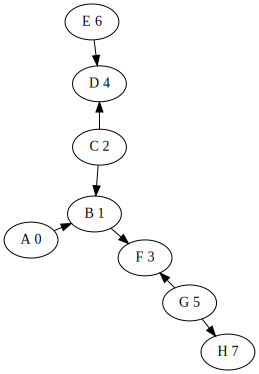

In [13]:
G = fromDot('''
strict graph A {
A -- B;
B -- C -- D -- E;
B -- F -- G -- H;
}''')

def bfs(graph, start):
    ''' 
    Iterate nodes starting from the node start
    '''
    visited, queue = dict(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited[vertex] = len(visited)
            queue.extend(set(graph[vertex]) - set(visited))
    return visited
visits = bfs(G, 'A')
draw(G,visits)

Notice that breadth-first search visits both branches alternatingly. 

## Depth-first search                 <a id="chapter17"></a>

Depth-first-search in graph starting from the node 'start'. The algorithm starts at the start and explores the first discovered branch until it reaches no more new nodes. It then uses a technique called backtracking to return to the last node with an undiscoverd branch. Also refer to <a href="https://en.wikipedia.org/wiki/Depth-first_search">this wikipedia page</a>.

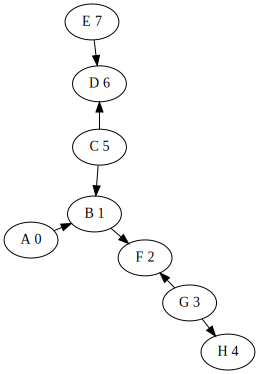

In [14]:
def dfs(graph, start):
    ''' 
    Depth-first-search in graph starting from the node 'start'.
    '''
    visited, stack = dict(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited[vertex] = len(visited)
            stack.extend(set(graph[vertex]) - set(visited.keys()))
    return visited
visits = dfs(G, 'A')
draw(G, visits)

Notice how depth-first search descends into one branch first and then switches to the second branch.